# Análise da Bolsa de valores

In [181]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [182]:
# Faz o download da PETR4 de janeiro a dezembro de 2023 
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709476,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809925,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [183]:
#Muda o nome de todas as colunas
dados.columns = ["Abertura", 'Máximo', 'Mínimo', 'Fechamento', 'Fech_Ajust', 'Volume']

In [184]:
dados = dados.rename_axis("Data")


Text(0, 0.5, 'Valor de fechamento')

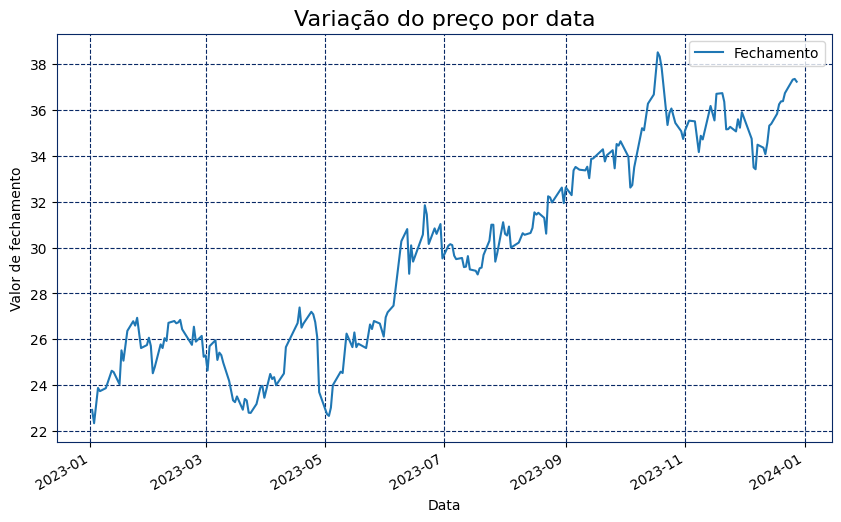

In [185]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])
plt.xlabel("Data")
plt.ylabel("Valor de fechamento") 

In [186]:
#Seleciona os primeiros 60 valores
df = dados.head(60).copy()

# Convertendo o índice em uma coluna de data
df['Data'] = df.index

# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num)

#df

## Criação do Gráfico de Velas

In [187]:
#Definição das Médias Móveis
df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

#Cria dois subplot com 2 linhas e uma coluna, com eixos x compartilhados.
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

#Cria um gráfico de velas, com abertura, máximo, mínimo, e fechamento
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Máximo'],
                             low=df['Mínimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

#Adiciona dois gráficso de linha ao gráfico de candlestick existente. 
#Estes gráficos representam a média móvel de 7 e 14 dias ao longo do tempo.

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

#Adiciona um gráfico de volume de transações na segunda linha do plot
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

#Configura o layout do plot
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

fig.show()

## Usando a biblioteca mplfinance

In [188]:
dados = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


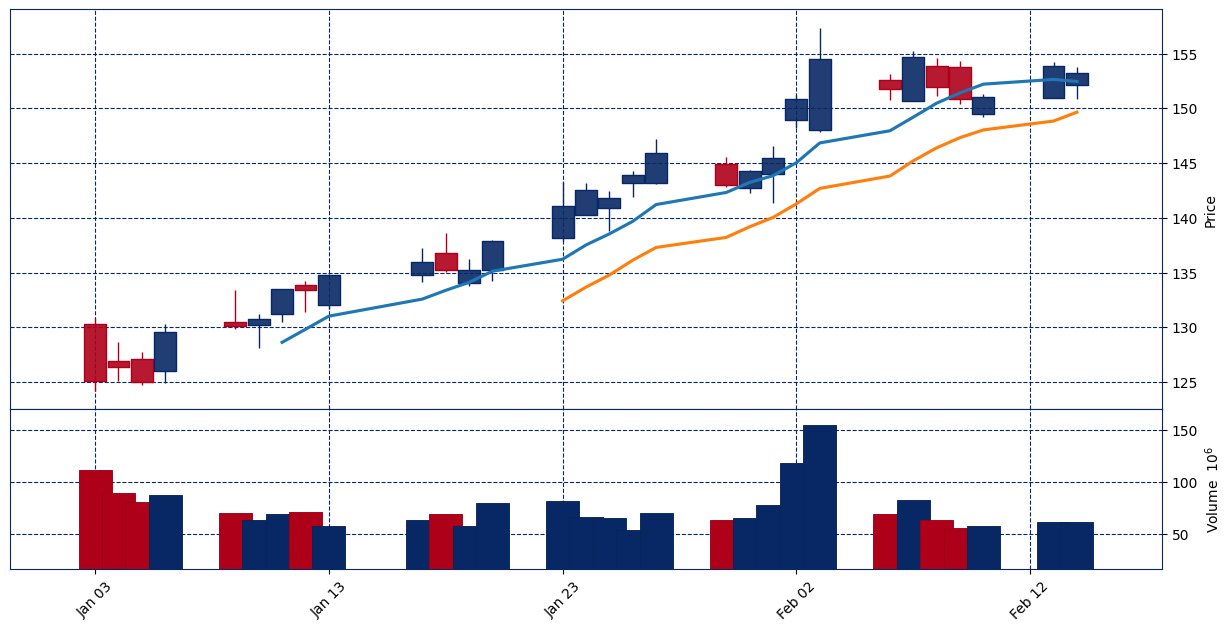

In [189]:
mpf.plot(dados.head(30), type = 'candle',
         figsize = (16,8), 
         volume = True, 
         mav = (7, 14), 
         style = 'starsandstripes', 
         show_nontrading=True)

## Modelo de Previsão de Machine Learning com Prophet

In [191]:
from prophet import Prophet

In [192]:
dados = yf.download('AAPL', start='2019-01-01', end='2023-12-31')
dados = dados.reset_index()

[*********************100%%**********************]  1 of 1 completed


### Dados de treino até Julho de 2023

In [193]:
#Separação dos dados em treino e teste da rede
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [194]:
#Estruturação dos dados para treinamento
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

## Parâmetros do Prophet
- **changepoint_prior_scale**: Este parâmetro controla a flexibilidade do modelo para se ajustar a mudanças na tendência. Valores mais altos tornam o modelo mais flexível para se adaptar a mudanças na tendência, enquanto valores mais baixos tornam o modelo mais rígido. O valor padrão é 0.05.

- **seasonality_prior_scale**: Este parâmetro controla a flexibilidade do modelo para se ajustar a sazonalidade. Valores mais altos tornam o modelo mais flexível para se adaptar a padrões sazonais, enquanto valores mais baixos tornam o modelo mais rígido. O valor padrão é 10.

- **holidays_prior_scale**: Este parâmetro controla a influência das feriados nos dados. Valores mais altos aumentam a influência dos feriados nas previsões, enquanto valores mais baixos diminuem essa influência. O valor padrão é 10.

- **seasonality_mode**: Este parâmetro controla o tipo de sazonalidade que o modelo assume. O valor padrão é 'additive', que assume que os efeitos sazonais são adicionados ao componente de tendência. Você também pode definir este parâmetro como 'multiplicative', que assume que os efeitos sazonais são multiplicados pelo componente de tendência.

- **changepoint_range**: Este parâmetro controla a porcentagem dos dados em que o modelo pode encontrar pontos de mudança na tendência. O valor padrão é 0.8, o que significa que o modelo pode encontrar até 80% dos pontos de mudança nos dados.

- **holidays**: Este parâmetro permite que você inclua feriados específicos no modelo. Você pode fornecer um DataFrame com datas de feriados e seus nomes para que o modelo leve em consideração esses feriados ao fazer previsões.

- **n_changepoints**: Este parâmetro define o número de pontos de mudança na tendência que o modelo tentará encontrar. O padrão é 25, mas você pode ajustá-lo para mais ou menos, dependendo da quantidade de mudanças na tendência que você espera em seus dados.

- **interval_width**: Este parâmetro define a largura do intervalo de confiança das previsões. O valor padrão é 0.8, o que significa que as previsões terão um intervalo de confiança de 80%. Você pode ajustá-lo para um valor maior ou menor, dependendo da sua confiança nas previsões.

- **changepoints**: Com esse parâmetro, você pode passar datas específicas manualmente para o modelo como tendências que ocorreram.

Para a criação do modelo, mudamos os parâmetros *changepoints*, considerando as datas de lançamento dos produtos da apple nas datas dentro do intervalo de treinamento. 
Além disso, tentando levar em conta o efeito da pandemia de *covid 19* sobre o comportamento dos dados, o valor da *escala de prioridade de tendências* foi aumentado para 20

In [195]:
#Aqui são passadas datas de lançamentos de produtos da Apple como changepoints
#Além disso, o changepoint_prior_scale foi alterado para 14
changepoints = ['2020-10-13', '2021-09-14', '2022-09-07']
modelo = Prophet(daily_seasonality = True,
                 changepoints = changepoints,
                 changepoint_prior_scale = 20,
                 #seasonality_prior_scale = 0.18)
                )
                
modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

00:55:50 - cmdstanpy - INFO - Chain [1] start processing
00:55:50 - cmdstanpy - INFO - Chain [1] done processing


In [196]:
futuro = modelo.make_future_dataframe(periods=450)
previsao = modelo.predict(futuro)

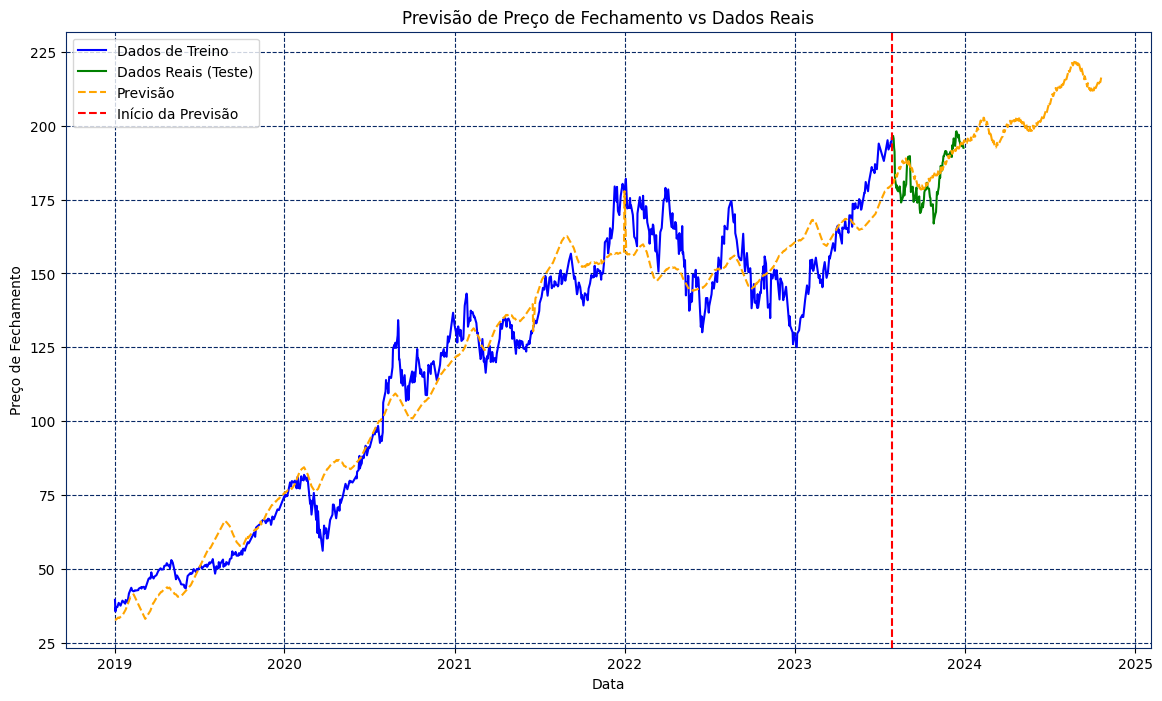

In [197]:
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()

### Dados de treino até março de 2023

In [198]:
dados_treino2 = dados[dados['Date'] < '2023-03-31']
dados_teste2 = dados[dados['Date'] >= '2023-03-31']

In [199]:
dados_prophet_treino2 = dados_treino2[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [200]:
modelo2 = Prophet(daily_seasonality = False,
                 changepoints = changepoints,
                 changepoint_prior_scale = 20,
                 seasonality_prior_scale = 0.08)
                
modelo2.add_country_holidays(country_name='US')

modelo2.fit(dados_prophet_treino2)

00:55:52 - cmdstanpy - INFO - Chain [1] start processing
00:55:52 - cmdstanpy - INFO - Chain [1] done processing


In [201]:
futuro2 = modelo2.make_future_dataframe(periods=450)
previsao2 = modelo2.predict(futuro2)

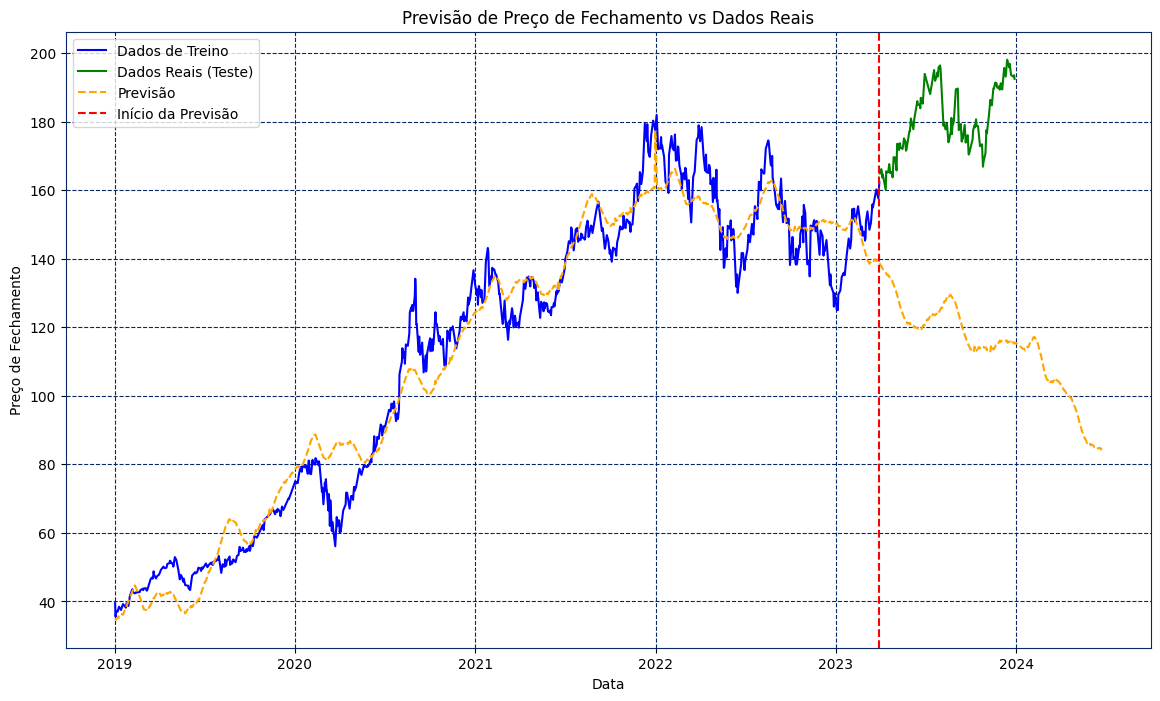

In [202]:
plt.figure(figsize=(14, 8))
plt.plot(dados_treino2['Date'], dados_treino2['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste2['Date'], dados_teste2['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao2['ds'], previsao2['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino2['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()